# CONTENTS:

### 1.)DATA QUALITY CHECK
#### A.)Missing Values
#### B.)Invalid Values
### 2.)OUTLIERS DETECTION
#### A.)Target Variable Distribution Analysis
### 3.)TRANSCATION VOLUMES OVER TIME
### 4.)CUSTOMER SEGMENTATION
#### A.)Finding Optimial Number of Clusters
#### B.)Customer Segmentation using K-Means Clustering
### 4.)OUTLIERS DETECTION FROM SCATTER PLOT OF CUSTOMER SEGMENTATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel('S:/Intern/3.ANZ/ANZ synthesised transaction dataset.xlsx')
import warnings
warnings.filterwarnings("ignore")

In [2]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df= data.copy()

# 1.DATA QUALITY CHECKS

### a.)MISSING VALUES

In [4]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [5]:
x = data.columns.to_list()
for i in data.dropna(axis = 1).columns.to_list():
    x.remove(i)
print("Null Value Containing columns are :\n"  , x)    

Null Value Containing columns are :
 ['card_present_flag', 'bpay_biller_code', 'merchant_id', 'merchant_code', 'merchant_suburb', 'merchant_state', 'merchant_long_lat']


SOLUTION:

All of 4326 missing values cause there is no merchant involved,So replaceing all missing values with 'non-merchant payment' would be better and other columns ['merchant_code','bpay_biller_code'] have more than 90 percent null values so it would be better if we drop these columns

### b.) INVALID VALUES

In [6]:
df.long_lat.sort_values()

5691      114.62 -28.80
4271      114.62 -28.80
3275      114.62 -28.80
3294      114.62 -28.80
6727      114.62 -28.80
              ...      
7344     255.00 -573.00
3512     255.00 -573.00
10045    255.00 -573.00
9507     255.00 -573.00
4939     255.00 -573.00
Name: long_lat, Length: 12043, dtype: object

SOLUTION :  -573 latitude is an invalid entry may be it would be -57.3

In [7]:
df[df.merchant_long_lat.isnull()] = df[df.merchant_long_lat.isnull()].fillna('non-merchant payment')
df.drop(columns = ['merchant_code','bpay_biller_code'],inplace = True)

In [8]:
df.isnull().sum()

status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

# 2.OUTLIERS DETECTION

### a.)For making better models target variable Distribution is so important as well as for outlier detection

#### a1.)Actual Distribution

Text(0.5, 1.0, 'Original Amount Distribution')

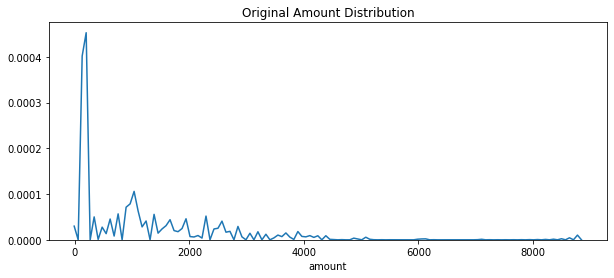

In [9]:
plt.figure(figsize=(10,4))
sns.distplot((data['amount']),hist = False)
plt.title('Original Amount Distribution')

The above distribution is a very bad to our model,there were many unusual outliers.

The best remedy would be transformation.Using Box_Cox transformation did'nt result in better distribution but Log transformation yield somewhat better result

#### a2.)Log Transformation of Distribution

Text(0.5, 1.0, 'After log Transformation')

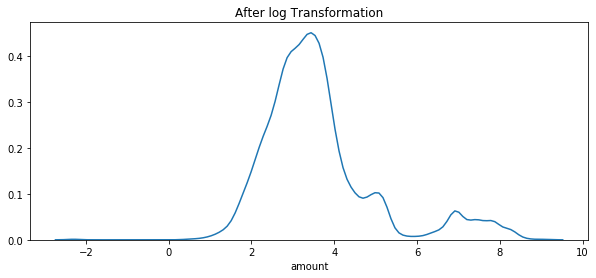

In [10]:
plt.figure(figsize=(10,4))
l = np.log(data['amount'])
sns.distplot(l,hist = False)
plt.title('After log Transformation')

Still the Above plot is not perfectly normal,now we need to remove outliers.

Using z-score method is not right because it is more sensitive to outliers ,instead using Quantile Deviation would yield better result as it quantile is not effected by outliers

#### a3.)Log Distribution + 95 Percent Quantile Region

In [11]:
quantile1, quantile3= np.percentile(np.log(data['amount']),[25,75])

print('quantile1: ',quantile1,',     quantile2 : ',quantile3)
iqr_value=quantile3-quantile1
print('iqr_value :',iqr_value)
iqr = iqr_value
lower_bound_val = quantile1 -(1.5 * iqr) 
upper_bound_val = quantile3 +(1.5 * iqr)

print('lower_bound_val :',lower_bound_val,', upper_bound_val :',upper_bound_val)

quantile1:  2.772588722239781 ,     quantile2 :  3.982574657037093
iqr_value : 1.2099859347973116
lower_bound_val : 0.9576098200438137 , upper_bound_val : 5.7975535592330605


Text(0.5, 1.0, 'After( log Transformation + Interquartile range outliers )')

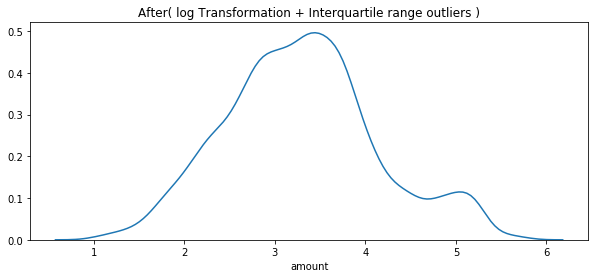

In [12]:
plt.figure(figsize=(10,4))
r =l[l.between(lower_bound_val,upper_bound_val, inclusive=False)]
sns.distplot(r,hist = False)
plt.title('After( log Transformation + Interquartile range outliers )')

The above distribution is Far better than previous distribution plots for the algorithms which assumes the target varibale distribution is normal.Add this Data can be used for Predictive analytics

# 3.Transcation Volumes over the Time

Text(0.5, 1, 'Mean Volume Transcations grouped by txn_description')

<Figure size 720x72 with 0 Axes>

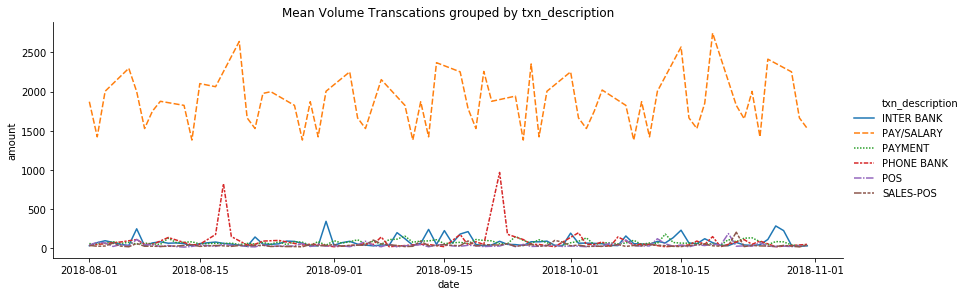

In [13]:
plt.figure(figsize=(10,1))
k = data[['date','amount','txn_description']].groupby(['date','txn_description']).mean().reset_index()
sns.relplot(x="date",data = k,y="amount",kind="line",style = 'txn_description',hue = 'txn_description',legend = 'brief',height = 4,aspect= 3 )
plt.title('Mean Volume Transcations grouped by txn_description' )

INSIGHT:

The above plot tells us that Customers Spending is too low compared to their Income i.e PAY/Salary transcation

All other payment types have nearly same transcation volumes

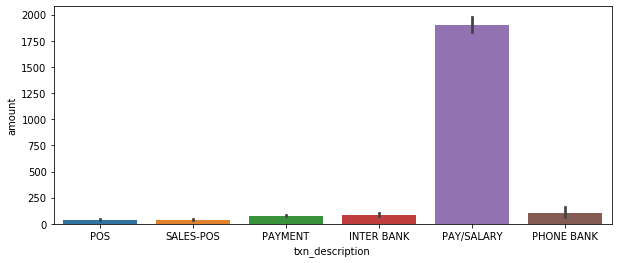

In [14]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'txn_description',y = 'amount',data =data)

In [15]:
credit = data.loc[data['movement']=='credit']
debit = data.loc[data['movement']=='debit']
credit.index = pd.to_datetime(credit['date'])
debit.index = pd.to_datetime(debit['date'])

credit_mntly = pd.DataFrame(index = data.customer_id.unique())
debit_mntly = pd.DataFrame(index = data.customer_id.unique())

credit_mntly['mean'] = credit[['customer_id','amount']].groupby(['customer_id']).mean()
debit_mntly['mean'] = debit[['customer_id','amount']].groupby(['customer_id']).mean()
credit_mntly['std'] = credit[['customer_id','amount']].groupby(['customer_id']).std()
debit_mntly['std'] = debit[['customer_id','amount']].groupby(['customer_id']).std()

mntly = pd.DataFrame(index = data.customer_id.unique())
mntly['credit_mean'] = credit[['customer_id','amount']].groupby(['customer_id']).mean()
mntly['debit_mean'] = debit[['customer_id','amount']].groupby(['customer_id']).mean()
mntly['credit_std'] = credit[['customer_id','amount']].groupby(['customer_id']).std()
mntly['debit_std'] = debit[['customer_id','amount']].groupby(['customer_id']).std()
mntly['no._of_txns'] = data.customer_id.value_counts()

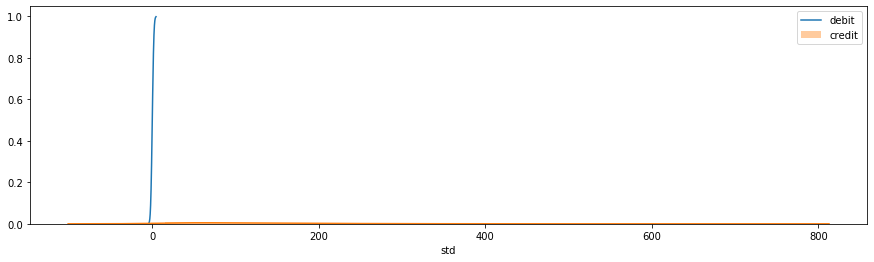

In [16]:
plt.figure(figsize=(15,4))
sns.kdeplot(credit_mntly['std'], cumulative=True, bw=1.5)
sns.distplot(debit_mntly['std'])
plt.legend(['debit','credit'])

The Debit amount have high variance compared to constant credit amount this can be intreprected as Salaries are constant but people spending are different

Text(0.5, 1, 'Monthly Mean Earning vs Monthly Mean Spending - Marker Sized by Number of Transcations by Customer')

<Figure size 1008x576 with 0 Axes>

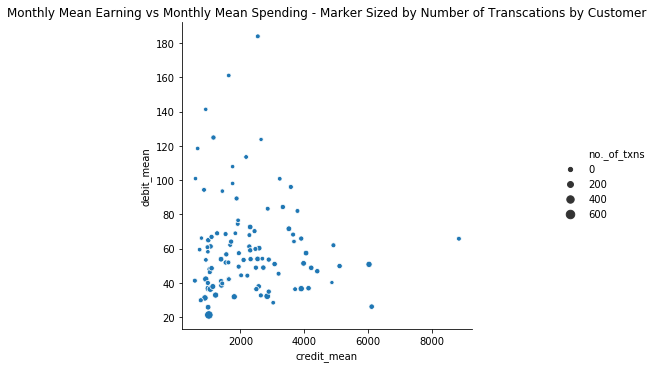

In [17]:
plt.figure(figsize=(14,8))
sns.relplot(x="credit_mean",data = mntly,y="debit_mean",kind="scatter",size='no._of_txns',legend = 'brief')
plt.title('Monthly Mean Earning vs Monthly Mean Spending - Marker Sized by Number of Transcations by Customer')

The Above Plot is derived from scatter plot of monthly average spending vs income for each customer and the Scatter point size tells how many transcations made by each customer

INSIGHT 1:

More number of transcations are made by customers in the plot who are closer to the Origin and customers who are far away from origin made less number of transcation

Customer Spending is very low compared to their Earnings 

Text(0.5, 1, 'Customer Spendings in 3 Months -Sampled Weekly')

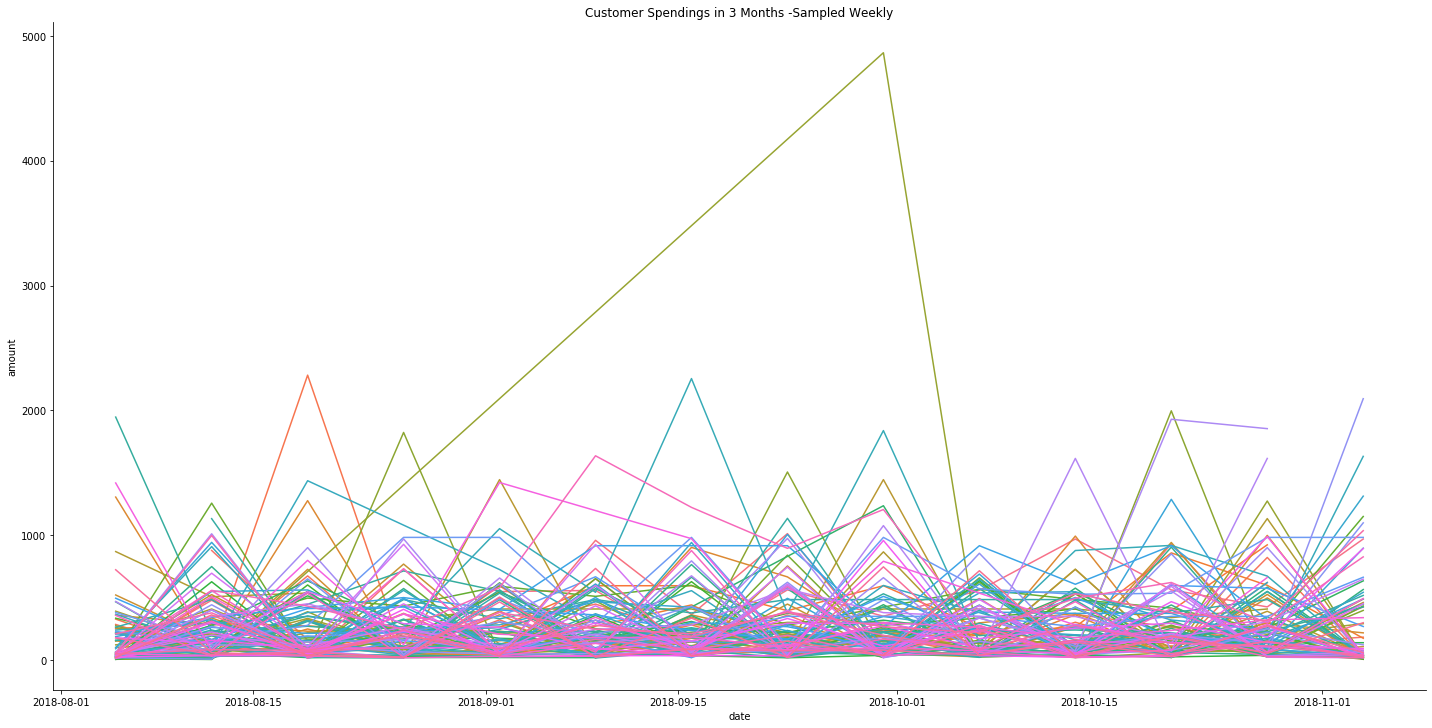

In [18]:
temp3 = data.copy()
temp3 = data.groupby(['date','customer_id']).mean()
temp3.reset_index(inplace = True)



temp = data.loc[data['movement'] == 'debit']
temp.set_index('date',inplace = True)

temp4 = temp3.set_index('date').groupby('customer_id')["amount"].resample("W").mean()
temp4 = temp4.to_frame()
temp4.reset_index(inplace = True)

sns.relplot(x= 'date', y="amount",data=temp4,kind="line",hue="customer_id",legend = False,height = 10,aspect = 2)
plt.title('Customer Spendings in 3 Months -Sampled Weekly')

The Above Plot is Mean weekly Customer Spending across the 3 months 

INSIGHTS:

From Above Plot we can see the spending habit of customer.The Traingle Waves from the plot tells us that Most of the customers spend money on alternate weeks and fewer of them spending for 2 weeks interval and small propotion  spends very rarely

# 4.CUSTOMER SEGMENTATION

### 1.)Finding Optimal Number of Clusters

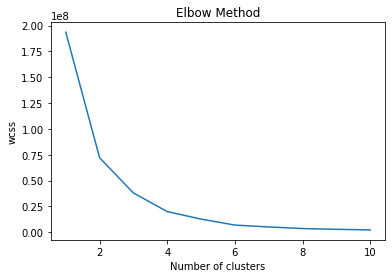

In [19]:
X = pd.DataFrame()
X['credit'] = mntly['credit_mean'] 
X['debit'] = mntly['debit_mean'] 
X = X.values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

INSIGHTS:

From Above Plot using Within-Cluster-Sum-of-Squares 6 is the Optimal Number of Clusters

### 2.)Using K-Means Clustering for Customer Segmentation

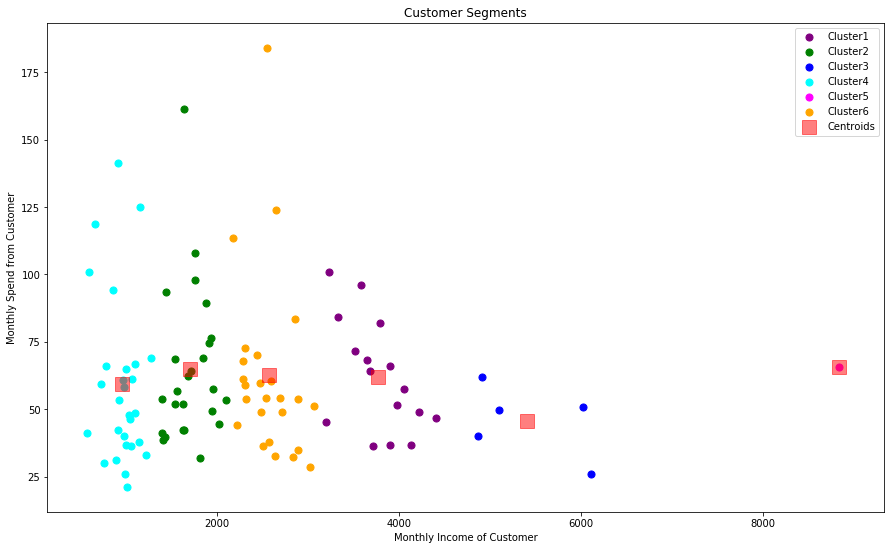

In [20]:
km6=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km6.fit_predict(X)

#Visualizing the clusters for k=6
plt.figure(figsize=(15,9))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='blue',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')
plt.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.5, label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Monthly Income of Customer')
plt.ylabel('Monthly Spend from Customer')
plt.legend()
plt.show()


# OUTLIERS DETECTION FROM CUSTOMER SEGMENTATION

From above Plot 

1.)we can Clearly see the Cluster 6 Customers are very rare and can be considered as OUTLIERS

2.)as well as 'Monthly Spend Customers' who are greater than 150 can be consider as OUTLIERS

3.Cluster 4,5 and 6 are more valued customers as they are Piling up the bank reserves.